In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats, shapiro, kstest, norm
from wordcloud import WordCloud
import re

In [2]:
df = pd.read_csv('data/netflix_titles.csv')

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


show_id - уникальный ID для каждого фильма/шоу  
type - отображает фильм это или шоу  
title - название  
director - режиссер  
cast - актеры, задействованные в фильме/шоу  
country - страна производства  
date_added - дата добавления на Netflix  
release_year - фактический год выпуска показа  
rating - телевизионный рейтинг фильма/шоу  
duration - продолжительность  
listed_in - жанр  
description - краткое описание  
##### (шоу в данном случае — это широкий термин, который может относиться к любому телевизионному шоу, включая сериалы/телесериалы, а также телепередачи, ток-шоу, реалити-шоу и другие форматы)

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 7.8 MB


### Укажем для каждого столбца тип данных так, чтоб сократить объем занимаемой памяти и ускорить выполнение операций. Заодно могут вылезти данные, которые не соответствуют типу столбца.

In [5]:
df['show_id'] = df['show_id'].astype('string')
df['type'] = df['type'].astype('category')
df['title'] = df['title'].astype('string')
df['director'] = df['director'].astype('string')
df['cast'] = df['cast'].astype('string')
df['country'] = df['country'].astype('string')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['rating'] = df['rating'].astype('category')
df['duration'] = df['duration'].astype('string')
df['listed_in'] = df['listed_in'].astype('string')
df['description'] = df['description'].astype('string')

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   string        
 1   type          8807 non-null   category      
 2   title         8807 non-null   string        
 3   director      6173 non-null   string        
 4   cast          7982 non-null   string        
 5   country       7976 non-null   string        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   string        
 10  listed_in     8807 non-null   string        
 11  description   8807 non-null   string        
dtypes: category(2), datetime64[ns](1), int64(1), string(8)
memory usage: 6.5 MB


In [7]:
df.describe()

,date_added,release_year
count,8709,8807.000000
mean,2019-05-23 01:45:29.452290816,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-20 00:00:00,2013.000000
50%,2019-07-12 00:00:00,2017.000000
75%,2020-08-26 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


#### Количество пропусков по столбцам:

In [8]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Проверка на аномальные даты

In [9]:
print("Количество записей с датами в будущем:", len(df[df['date_added'] > pd.to_datetime('today')]))

print("Количество записей с датами до 1950 года:", len(df[df['date_added'] < pd.to_datetime('1950-01-01')]))

Количество записей с датами в будущем: 0
Количество записей с датами до 1950 года: 0


#### Посчитаем медиану, среднее, минимум и максимум длительности фильмов/шоу

In [10]:
df[['type','duration']].head(7)

,type,duration
0,Movie,90 min
1,TV Show,2 Seasons
2,TV Show,1 Season
3,TV Show,1 Season
4,TV Show,2 Seasons
5,TV Show,1 Season
6,Movie,91 min


#### В столбце с длительностью как видим для фильмов указано количество минут, а для шоу - количество сезонов. Поэтому мы будем подсчитывать статистические показатели для фильмов и шоу по отдельности.

#### Но для начала надо отделить числовые и текстовые значения из столбца "duration"

In [11]:
df[['Количество минут/сезонов','Минуты/Сезоны']]= df.duration.str.extract(r'(\d+)\s*(\w+)')

In [12]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Количество минут/сезонов,Минуты/Сезоны
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,<NA>,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,<NA>,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons


#### Теперь посмотрим верно ли мы сделали разделение. В таком случае в столбце с количеством должны быть только числовые значения, а в столбце "Минуты/Сезоны" - только текстовые

In [13]:
df['Количество минут/сезонов'] = pd.to_numeric(df['Количество минут/сезонов'], errors='coerce')
df['Минуты/Сезоны'] = df['Минуты/Сезоны'].astype('string')

In [14]:
print(list(df['Количество минут/сезонов'].unique()))

[90, 2, 1, 91, 125, 9, 104, 127, 4, 67, 94, 5, 161, 61, 166, 147, 103, 97, 106, 111, 3, 110, 105, 96, 124, 116, 98, 23, 115, 122, 99, 88, 100, 6, 102, 93, 95, 85, 83, 113, 13, 182, 48, 145, 87, 92, 80, 117, 128, 119, 143, 114, 118, 108, 63, 121, 142, 154, 120, 82, 109, 101, 86, 229, 76, 89, 156, 112, 107, 129, 135, 136, 165, 150, 133, 70, 84, 140, 78, 7, 64, 59, 139, 69, 148, 189, 141, 130, 138, 81, 132, 10, 123, 65, 68, 66, 62, 74, 131, 39, 46, 38, 8, 17, 126, 155, 159, 137, 12, 273, 36, 34, 77, 60, 49, 58, 72, 204, 212, 25, 73, 29, 47, 32, 35, 71, 149, 33, 15, 54, 224, 162, 37, 75, 79, 55, 158, 164, 173, 181, 185, 21, 24, 51, 151, 42, 22, 134, 177, 52, 14, 53, 57, 28, 50, 26, 45, 171, 27, 44, 146, 20, 157, 203, 41, 30, 194, 233, 237, 230, 195, 253, 152, 190, 160, 208, 180, 144, 174, 170, 192, 209, 187, 172, 16, 186, 11, 193, 176, 56, 169, 40, 168, 312, 153, 214, 31, 163, 19, <NA>, 179, 43, 200, 196, 167, 178, 228, 18, 205, 201, 191]


In [15]:
df['Минуты/Сезоны'].unique()

<StringArray>
['min', 'Seasons', 'Season', <NA>]
Length: 4, dtype: string

#### Я изучил данные, и понял, что значение "seasons" ставится для нескольких сезонов, а значение "season" для шоу, имеющих только 1 сезон

#### В обоих столбцах присутствуют значения Na, проверим совпадают ли они

In [16]:
df[(df['Минуты/Сезоны'].isna())|(df['Количество минут/сезонов'].isna())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Количество минут/сезонов,Минуты/Сезоны
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,<NA>,Movies,"Louis C.K. muses on religion, eternal love, gi...",<NA>,<NA>
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,<NA>,Movies,Emmy-winning comedy writer Louis C.K. brings h...,<NA>,<NA>
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,<NA>,Movies,The comic puts his trademark hilarious/thought...,<NA>,<NA>


#### Значения NaN присутствуют в обоих экстрагированных столбцах, и они соответствуют столбцу "duration", в котором в таких случаях тоже стоит значение NaN

#### Но как можно заметить, столбец rating содержит данные о минутах, а значит нам нужно его перенести в duration и выполнить последующие операции экстрагирования

In [17]:
df[df.rating.str.contains('min|Season', na=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Количество минут/сезонов,Минуты/Сезоны
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,<NA>,Movies,"Louis C.K. muses on religion, eternal love, gi...",<NA>,<NA>
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,<NA>,Movies,Emmy-winning comedy writer Louis C.K. brings h...,<NA>,<NA>
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,<NA>,Movies,The comic puts his trademark hilarious/thought...,<NA>,<NA>


#### Как видим, количество значений с вхожднием 'min' или 'Season' в строку, совпадает с количеством отсутствующих значений в столбце duration

In [18]:
df.loc[df.duration.isna(),'duration'] = df.loc[df.duration.isna(),'rating'].astype('string')

In [19]:
extracted = df.loc[df.rating.str.contains('min', na=False), 'duration'].str.extract(r'(\d+)\s*(\w+)')

In [20]:
df.loc[df.rating.str.contains('min', na=False), 'Количество минут/сезонов'] = pd.to_numeric(extracted[0], errors='coerce')
df.loc[df.rating.str.contains('min', na=False), 'Минуты/Сезоны'] = extracted[1]
df.loc[df.rating.astype('string').str.contains('min', na=False),'rating'] = pd.NA

In [21]:
df.loc[df.rating.isna(),:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Количество минут/сезонов,Минуты/Сезоны
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",74,min
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,84,min
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,66,min
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,<NA>,"Oprah Winfrey, Ava DuVernay",<NA>,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,37,min
6827,s6828,TV Show,Gargantia on the Verdurous Planet,<NA>,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",1,Season
7312,s7313,TV Show,Little Lunch,<NA>,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",1,Season
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",115,min


#### Теперь начнем вычислять статистики для фильмов и шоу по отдельности

In [22]:
df_movie = df[df['type']=='Movie']
df_show = df[df['type']=='TV Show']

In [23]:
print("Медиана количества минут в фильмах",round(df_movie['Количество минут/сезонов'].median()))
print("Медиана количества сезонов шоу",round(df_show['Количество минут/сезонов'].median()))
print()
print("Среднее значение количества минут в фильмах",round(df_movie['Количество минут/сезонов'].mean(),2))
print("Среднее значение количества сезонов шоу",round(df_show['Количество минут/сезонов'].mean(),2))
print()
print("Минимальное количество минут в фильмах",df_movie['Количество минут/сезонов'].min())
print("Минимальное количество сезонов шоу",df_show['Количество минут/сезонов'].min())
print()
print("Максимальное количество минут в фильмах",df_movie['Количество минут/сезонов'].max())
print("Максимальное количество сезонов шоу",df_show['Количество минут/сезонов'].max())

Медиана количества минут в фильмах 98
Медиана количества сезонов шоу 1

Среднее значение количества минут в фильмах 99.56
Среднее значение количества сезонов шоу 1.76

Минимальное количество минут в фильмах 3
Минимальное количество сезонов шоу 1

Максимальное количество минут в фильмах 312
Максимальное количество сезонов шоу 17


#### Теперь визуализируем распределение длительности

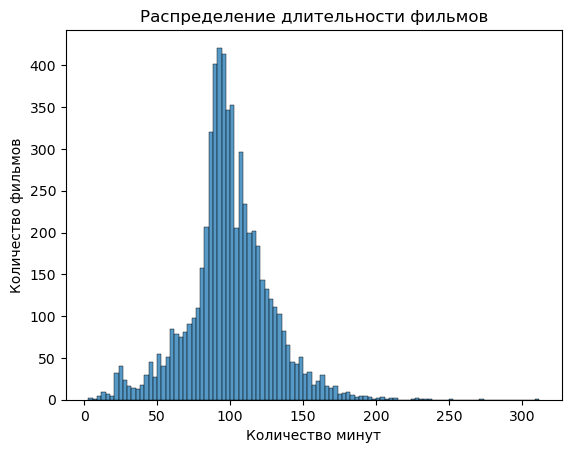

In [24]:
sns.histplot(x='Количество минут/сезонов',data=df_movie)
plt.title('Распределение длительности фильмов')
plt.xlabel('Количество минут')
plt.ylabel('Количество фильмов')

plt.show()

#### Как видно из гистограммы, основная масса фильмов сосредоточена в диапазоне от 50 до 150 минут. Присутствует хвост слева и большой хвост справа.
#### Проверим на корректность фильмы с количеством минут менее 10

In [25]:
df_movie[df_movie['Количество минут/сезонов'] <10]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Количество минут/сезонов,Минуты/Сезоны
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,2020-12-28,2020,PG-13,8 min,Dramas,Animation and activism unite in this multimedi...,8,min
1557,s1558,Movie,Canvas,Frank E. Abney III,<NA>,United States,2020-12-11,2020,G,9 min,"Children & Family Movies, Dramas","After a heartbreaking loss, a grandfather stru...",9,min
2713,s2714,Movie,Sol Levante,Akira Saitoh,<NA>,Japan,2020-04-02,2020,TV-14,5 min,"Action & Adventure, Anime Features, Internatio...",A young warrior and her familiar search for th...,5,min
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",<NA>,United States,2019-06-04,2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",3,min


#### После проверки на официальном сайте Netflix, все данные оказались корректными.

##### Теперь проверим на корректность фильмы с количеством минут более 200

In [26]:
df_movie[df_movie['Количество минут/сезонов'] > 200]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Количество минут/сезонов,Минуты/Сезоны
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States",2021-09-01,1984,R,229 min,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...,229,min
717,s718,Movie,Headspace: Unwind Your Mind,<NA>,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",<NA>,2021-06-15,2021,TV-G,273 min,Documentaries,"Do you want to relax, meditate or sleep deeply...",273,min
806,s807,Movie,Seven Souls in the Skull Castle: Season Moon J...,Hidenori Inoue,"Sota Fukushi, Taichi Saotome, Shohei Miura, Ke...",<NA>,2021-06-02,2017,TV-14,204 min,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t...",204,min
807,s808,Movie,Seven Souls in the Skull Castle: Season Moon K...,Hidenori Inoue,"Mamoru Miyano, Hiroki Suzuki, Tomoki Hirose, R...",<NA>,2021-06-02,2017,TV-PG,212 min,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t...",212,min
1019,s1020,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...","India, United Kingdom",2021-04-17,2001,PG,224 min,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ...",224,min
2126,s2127,Movie,What's Your Raashee?,Ashutosh Gowariker,"Harman Baweja, Priyanka Chopra, Manju Singh, A...",India,2020-08-15,2009,TV-PG,203 min,"Comedies, International Movies, Music & Musicals","To protect his family from ruin, Yogesh must m...",203,min
2483,s2484,Movie,Fifty Year Old Teenager,Fouad Al Shatti,"Abdulhussain Abdulredah, Haifaa Adel, Dawood H...",<NA>,2020-05-21,1996,TV-14,204 min,"Comedies, International Movies",The life of a married 50-year-old doctor turns...,204,min
2484,s2485,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",<NA>,2020-05-21,1982,TV-PG,233 min,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...,233,min
2487,s2488,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,2020-05-21,1979,TV-14,237 min,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,237,min
2488,s2489,Movie,Raya and Sakina,Hussein Kamal,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",<NA>,2020-05-21,1984,TV-14,230 min,"Comedies, Dramas, International Movies",When robberies and murders targeting women swe...,230,min


#### После проверки нескольких фильмов можно сделать вывод, что с количеством минут 200-250 действительно существуют
#### Проверим фильмы с количеством минут 250+

In [27]:
df_movie[df_movie['Количество минут/сезонов'] > 250]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Количество минут/сезонов,Минуты/Сезоны
717,s718,Movie,Headspace: Unwind Your Mind,<NA>,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",<NA>,2021-06-15,2021,TV-G,273 min,Documentaries,"Do you want to relax, meditate or sleep deeply...",273,min
2491,s2492,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,2020-05-21,1973,TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,253,min
4253,s4254,Movie,Black Mirror: Bandersnatch,<NA>,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312,min


#### У таких фильмов оказалось некорректным указанное количество минут. У двух из этих фильмов взято количество минут анталогии (сериалы, где каждая серия представляет собой самостоятельную историю), а не самого фильма. У третьего - количество минут просто некорректное.

#### Можно было бы провести кластеризацию и определив, к какому кластеру относятся фильмы, на этой основе добавить среднее значение этого кластера. Но для данного проекта я не готов это делать. Так же можно добавить значения вручную.
#### Я же буду изменять значения просто путем замены на медиану

In [28]:
df_movie.loc[df_movie['Количество минут/сезонов'] > 250, 'Количество минут/сезонов'] = df_movie[df_movie['Количество минут/сезонов'] <= 250]['Количество минут/сезонов'].median()

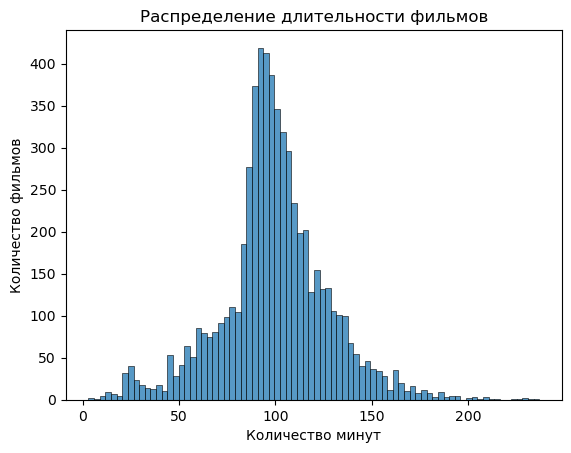

In [29]:
sns.histplot(x='Количество минут/сезонов',data=df_movie)
plt.title('Распределение длительности фильмов')
plt.xlabel('Количество минут')
plt.ylabel('Количество фильмов')

plt.show()

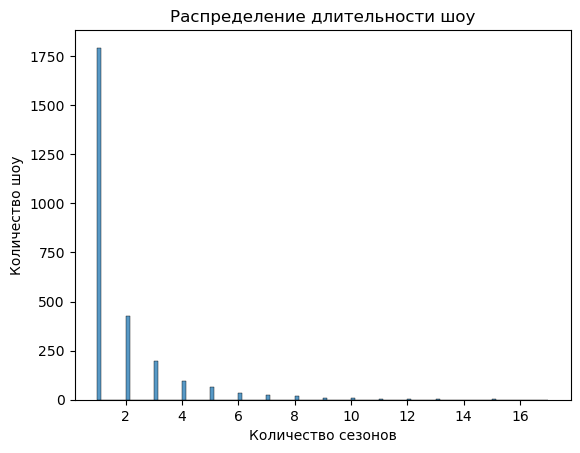

In [30]:
sns.histplot(x='Количество минут/сезонов',data=df_show)
plt.title('Распределение длительности шоу')
plt.xlabel('Количество сезонов')
plt.ylabel('Количество шоу')

plt.show()

#### На гистограмме длительности шоу видно, что основная масса шоу длится 1-3 сезона. Проверим шоу, с длительностью более 13 сезонов

In [31]:
df_show[df_show['Количество минут/сезонов'] > 13]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Количество минут/сезонов,Минуты/Сезоны
548,s549,TV Show,Grey's Anatomy,<NA>,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,17,Seasons
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020-06-05,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",15,Seasons
4798,s4799,TV Show,NCIS,<NA>,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,2017,TV-14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,15,Seasons


#### Проверка показала, что данные корректны.

#### Вычислим стандартное отклонение и межквартильный размах для длительности фильмов/шоу

In [32]:
print('Стандартное отклонение для фильмов:', df_movie['Количество минут/сезонов'].std())
print('Стандартное отклонение для шоу:', df_show['Количество минут/сезонов'].std())

Стандартное отклонение для фильмов: 28.003213801274033
Стандартное отклонение для шоу: 1.5827519028726411


In [33]:
Q1 = df_movie['Количество минут/сезонов'].quantile(0.25)
Q3 = df_movie['Количество минут/сезонов'].quantile(0.75)
IQR = Q3 - Q1
print(f"Межквартильный размах для фильмов: {IQR}")
Q1 = df_show['Количество минут/сезонов'].quantile(0.25)
Q3 = df_show['Количество минут/сезонов'].quantile(0.75)
IQR = Q3 - Q1
print(f"Межквартильный размах для шоу: {IQR}")

Межквартильный размах для фильмов: 27.0
Межквартильный размах для шоу: 1.0


#### Чтобы с большей уверенностью знать о параметрах генеральной совокупности, или для сравнения параметров различных выборок (в A/B тестировании), применяются доверительные интервалы.
#### Рассчитаем 95% доверительный интервал (показывает, что с уровнем доверия в 95% мы можем полагать, что истинное среднее значение для длительности в генеральной совокупности фильмов/шоу нетфликса, лежит в данном интервале) для средней длительности. 

In [34]:
shapiro_stat, shapiro_p = shapiro(df_movie['Количество минут/сезонов'])

ks_stat, ks_p = kstest(df_movie['Количество минут/сезонов'], 'norm', 
                       args=(df_movie['Количество минут/сезонов'].mean(), 
                             df_movie['Количество минут/сезонов'].std(ddof=1)))

{
    "Тест Шапиро-Уилка": {"statistic": shapiro_stat, "p_value": shapiro_p},
    "Критерий Колмогорова-Смирнова": {"statistic": ks_stat, "p_value": ks_p}
}

C:\Users\perfe\AppData\Local\Temp\ipykernel_2548\74984075.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6131.
  shapiro_stat, shapiro_p = shapiro(df_movie['Количество минут/сезонов'])


{'Тест Шапиро-Уилка': {'statistic': 0.9741025535094473,
  'p_value': 6.30123950232737e-32},
 'Критерий Колмогорова-Смирнова': {'statistic': 0.0843786240535711,
  'p_value': 2.007967768258251e-38}}

#### Отклоняем гипотезу о нормальности данных для распределения длительности фильмов. А для распределения длительности шоу на графике видно, что данные не нормальны.

#### Поэтому будем вычислять доверительные интервалы с помощью bootstrap

In [35]:
def bootstrap(data:pd.Series, n_iterations=10_000, func=np.mean, confidence:float=0.95):
    bootstrap_means = []
    n = len(data)
    for i in range(n_iterations):
        sample = data.sample(n=n,replace=True, random_state=1+i)
        bootstrap_means.append(func(sample))
    
    # Вычисление доверительного интервала
    alpha = 100*((1 - confidence)/2)
    ci_lower = np.percentile(bootstrap_means, alpha)
    ci_upper = np.percentile(bootstrap_means, 100-alpha)
    return print(f"95% Доверительный интервал с использованием бутстраппинга: ({ci_lower}, {ci_upper})")

bootstrap(df_movie['Количество минут/сезонов'])

95% Доверительный интервал с использованием бутстраппинга: (98.77311205349862, 100.19006279562876)


#### Для сравнения рассчитаем классический параметрический метод, который обычно применяется для случаев, где данные распределены нормально

In [36]:
mean = df_movie['Количество минут/сезонов'].mean()
std_dev = df_movie['Количество минут/сезонов'].std(ddof=1)

n = len(df_movie['Количество минут/сезонов'])

# 95% доверительный интервал
confidence = 0.95
z = norm.ppf((1 + confidence) / 2)
margin_of_error = z * (std_dev / np.sqrt(n))
ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

print(f"95% Доверительный интервал параметрическим методом: ({ci_lower}, {ci_upper})")

95% Доверительный интервал параметрическим методом: (98.77531286918779, 100.17722342179249)


#### Так как наша выборка состоит из большого числа значений, параметрический вариант справляется так же хорошо, как и bootstrap, из-за ЦПТ

#### Теперь рассчитаем с помощью bootstrap доверительный интервал для шоу

In [37]:
bootstrap(df_show['Количество минут/сезонов'])

95% Доверительный интервал с использованием бутстраппинга: (1.7070254110612855, 1.8243647234678624)


#### К слову можно рассчитать доверительные интервалы и для других параметров, например для стандартного отклонения

In [38]:
bootstrap(df_movie['Количество минут/сезонов'], func=np.std) # стандартное отклонение длительности фильмов

95% Доверительный интервал с использованием бутстраппинга: (27.34744067654142, 28.677686867986285)


#### Отобразим топ-10 стран по количеству выпущеных фильмов/шоу
#### Столбцы country (страны производства) и listed_in (жанры) в некоторых строках содержат несколько значений перечисленных через запятую. Поэтому для корректного отображения топ-10 стран нам нужно строки, содержащие несколько значений разбить так, что каждый элемент таких строк будет содержаться в отдельной строке. 

In [39]:
df['country'].sample(1,random_state=12).iloc[0] # Пример строки, в которой указаны несколько стран

'United States, China, Canada'

In [40]:
df_country_exploded = df['country'].dropna().str.split(',').explode().str.strip()
df_country_exploded

0       United States
1        South Africa
4               India
7       United States
7               Ghana
            ...      
8801           Jordan
8802    United States
8804    United States
8805    United States
8806            India
Name: country, Length: 10019, dtype: object

In [41]:
df_country_exploded_top10 = df_country_exploded.value_counts().reset_index().head(10)
df_country_exploded_top10

,country,count
0,United States,3690
1,India,1046
2,United Kingdom,806
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


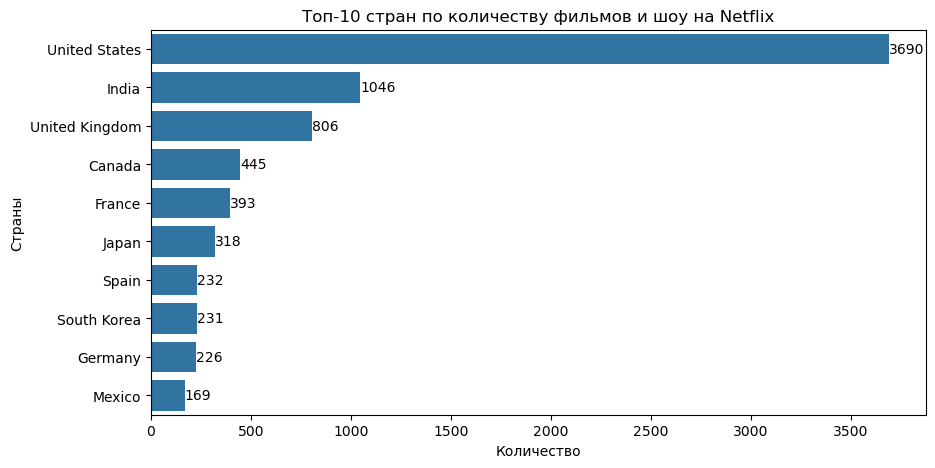

In [42]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_country_exploded_top10, x='count', y='country')


# Добавление значений на график
for index, row in df_country_exploded_top10.iterrows():
    ax.text(row['count'], index, f'{row["count"]}', va='center', ha='left', fontsize=10)

plt.title('Топ-10 стран по количеству фильмов и шоу на Netflix')
plt.xlabel('Количество')
plt.ylabel('Страны')

plt.show()

#### Проведем анализ каждого десятилетия выпуска фильмов на среднюю продолжительность фильмов и шоу

In [43]:
df_movie['Десятилетие выпуска'] = (df_movie['release_year'] // 10) * 10
df_show['Десятилетие выпуска'] = (df_show['release_year'] // 10) * 10

C:\Users\perfe\AppData\Local\Temp\ipykernel_2548\942146356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['Десятилетие выпуска'] = (df_movie['release_year'] // 10) * 10
C:\Users\perfe\AppData\Local\Temp\ipykernel_2548\942146356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['Десятилетие выпуска'] = (df_show['release_year'] // 10) * 10


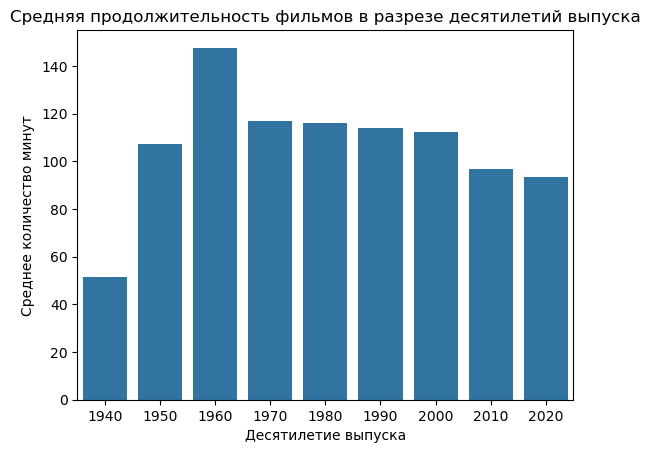

In [44]:
sns.barplot(data=df_movie.groupby(['Десятилетие выпуска'])['Количество минут/сезонов'].mean().reset_index(), x = 'Десятилетие выпуска', y='Количество минут/сезонов')
plt.title('Средняя продолжительность фильмов в разрезе десятилетий выпуска')
plt.ylabel('Среднее количество минут')
plt.xlabel('Десятилетие выпуска')
plt.show()

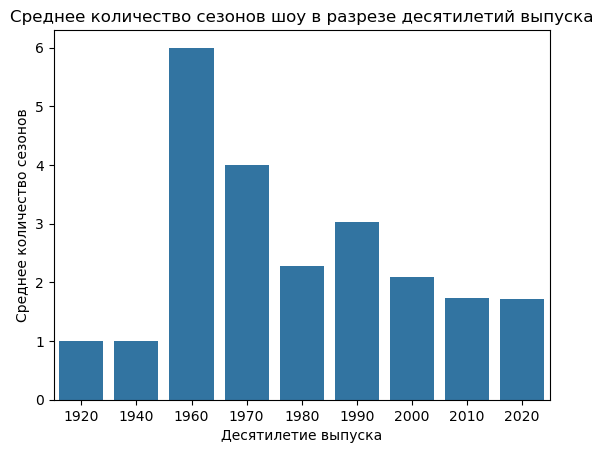

In [45]:
sns.barplot(data=df_show.groupby(['Десятилетие выпуска'])['Количество минут/сезонов'].mean().reset_index(), x = 'Десятилетие выпуска', y='Количество минут/сезонов')
plt.title('Среднее количество сезонов шоу в разрезе десятилетий выпуска')
plt.ylabel('Среднее количество сезонов')
plt.xlabel('Десятилетие выпуска')
plt.show()

#### Как видно, в последние 2 десятилетия количество и сезонов и минут снижается в сравнении с предыдущими

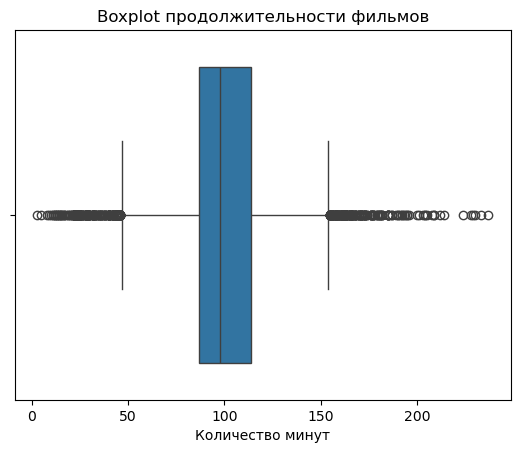

In [46]:
sns.boxplot(data=df_movie, x='Количество минут/сезонов')
plt.title('Boxplot продолжительности фильмов')
plt.xlabel('Количество минут')

plt.show()

#### Топ-20 самых популярных жанров

In [47]:
join_genres = ' '.join(df['listed_in'].dropna().str.lower().str.strip().tolist())
join_genres = re.sub(r'[^\w\s]', '', join_genres)

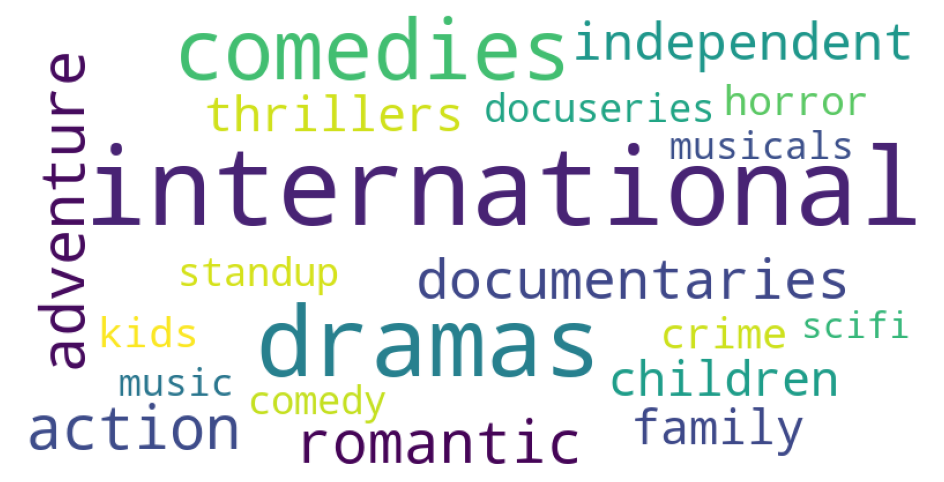

In [48]:
wordcloud = WordCloud(
    width=800,              
    height=400,             
    background_color='white',
    margin=10,
    collocations=False,
    stopwords=['movies', 'show', 'tv', 'shows'],
    max_words=20,          
    random_state=1         
).generate(join_genres)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Некоторые выводы:
- Основная масса фильмов длится 50–150 минут, реже встречаются короткие (5–10 мин), а ещё реже очень длинные (200+)
- Шоу, в основном, идут 1–3 сезона, но встречаются долгоживущие проекты
- США лидирует по количеству контента, значительно превосходя остальные страны
- Использование доверительных интервалов даёт оценку, что средняя длительность фильмов 99-100 минут (с 95% уровнем доверия)
- Аномальные значения продолжительности более 250 минут оказались ошибочными
- Данные столбца date_added тоже выглядят адекватно, без аномалий в прошлом и будущем
- В последние 2 десятилетия идет тренд на снижение продолжительности фильмов и шоу